In [398]:
import numpy as np
from matplotlib import pyplot as plt
import os

In [399]:
ratio = 2000    #T/dt
Tvec = [1, 2, 4]
dts = np.zeros(len(Tvec))
for i in np.arange(0, len(Tvec)):
    dts[i] = Tvec[i]/ratio
dts

array([0.0005, 0.001 , 0.002 ])

In [400]:
firstplot = 1

In [401]:
# Retrieve evolution parameters
f = open("tdgl_result.dat", "r")
i = 0
for row in f:
  if i == 0:
    N, tmax, dx, dt, seed, A, Thalf = row.split(" ")
  if i == 1:
    temp, tempu0 = row.split(" ") # Save initial state (t=0)
    break
  i = i + 1
u02 = float(tempu0)**2*np.ones(int(N))

In [402]:
# Plot the Monitoring of SPACE Average in time
f = open("fileAveout.dat", "r")
i = 0
n = 1
laststep = 100000   # Must be bigger than than the number of lines of .dat file of the state

T = 2*float(Thalf)   # Period of C(t)

tt = np.zeros(laststep)
uu = np.zeros(laststep)
nn = np.zeros(laststep)
for row in f:
    x, y = row.split(" ")
    # Select only times t = nT where T is the period
    if float(x) >= n*T:
        tt[i] = float(x)
        uu[i] = float(y)
        nn[i] = tt[i]/T
        i = i + 1
        n = n + 1
        print(tt[i-1]/T)    # It must be 1,2,3,...
    

In [403]:
# Save tdg_results with custom name
import shutil
import os
dir = "cosine changing dt T = " + str(T)
name = "dt = " + str(dt) + ".dat"
if not os.path.isdir(dir):
    os.makedirs(dir)
shutil.copyfile("tdgl_result.dat", dir + "/" + name)
# Save Average(t) and C(t)
shutil.copyfile("fileAveout.dat", dir + "/Ave " + name)
shutil.copyfile("fileCout.dat", dir + "/C " + name)

'cosine changing dt T = 4.0/C dt = 0.0020000000.dat'

ValueError: operands could not be broadcast together with shapes (0,) (0,3) 

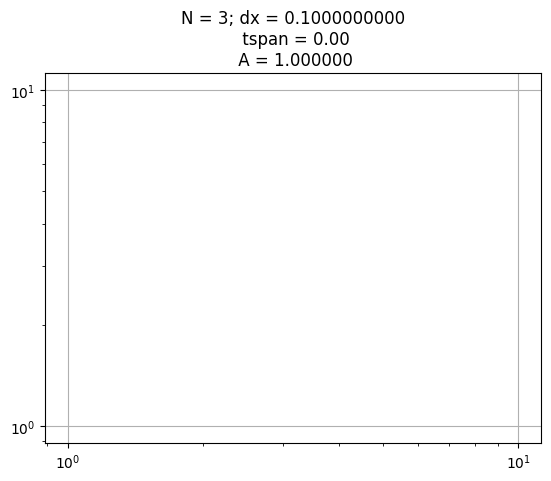

In [404]:
if firstplot == 1:
    fig, ax = plt.subplots()
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_title("N = " + str(N) + "; dx = " + str(dx) + "\n tspan = " + str(tmax)  + "\n A = " + str(A))
    ax.grid()
# Plot
ax.plot(nn[0:i],uu[0:i]-1/(u02),label="dt = " + str(dt) + "; T = " + str(T))  # We remove 1/u0^2 to have a power law behaviour from t=0 (otherwise it gets so only when the power law gets more important than the added term)
ax.legend()
ax.set_xlabel("n")
ax.set_ylabel("u(t=nT)")
fig

1.0
2.0
4.0
5.0
5.999999999999999
6.999999999999999
8.0
9.0
10.0
11.0
11.999999999999998
13.0
13.999999999999998
15.0
16.0
17.0
18.0
18.999999999999996
20.0
21.0
22.0
22.999999999999996
23.999999999999996
25.0
26.0
27.0
27.999999999999996
28.999999999999996
30.0
31.0
32.0
32.99999999999999
34.0
35.0
36.0
37.0
37.99999999999999
39.0
40.0
40.99999999999999
42.0
42.99999999999999
44.0
45.0
45.99999999999999
47.0
47.99999999999999
49.0
50.0
50.99999999999999
52.0
52.99999999999999
54.0
55.0
55.99999999999999
57.0
57.99999999999999
59.0
60.0
60.99999999999999
62.0
62.99999999999999
64.0
65.0
65.99999999999999
67.0
68.0
69.0
70.0
70.99999999999999
72.0
73.0
74.0
75.0
75.99999999999999
77.0
78.0
79.0
80.0
80.99999999999999
81.99999999999999
83.0
84.0
85.0
85.99999999999999
86.99999999999999
88.0
89.0
90.0
90.99999999999999
91.99999999999999
93.0
94.0
95.0
95.99999999999999
96.99999999999999
98.0
99.0
100.0
100.99999999999999
101.99999999999999
103.0
104.0
105.0
105.99999999999999
106.99999999

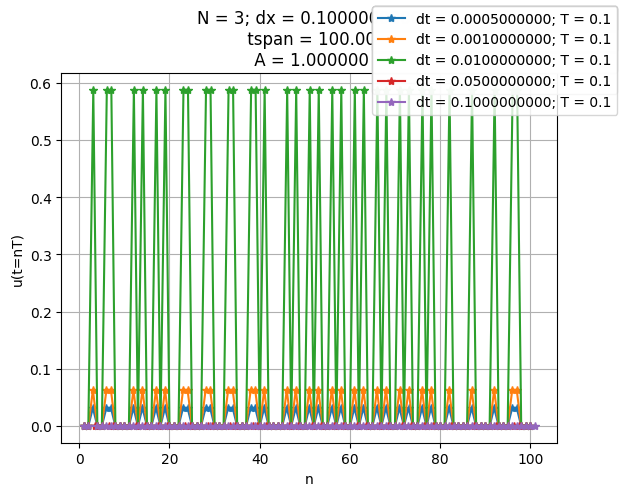

In [ ]:
#C(t) at times t = n*T
f = open("fileCout.dat", "r")
i = 0
n = 1
laststep = 100000   # Must be bigger than than the number of lines of .dat file of the state

T = 2*float(Thalf)   # Period of C(t)

cc = np.zeros(laststep)
tt = np.zeros(laststep)
nn = np.zeros(laststep)
for row in f:
    t, c = row.split(" ")
    # Select only times t = nT where T is the period
    if float(t) >= n*T:
        tt[i] = float(t)
        cc[i] = float(c)
        nn[i] = tt[i]/T
        i = i + 1
        n = n + 1
        print(float(t)/T)
if firstplot == 1:
    figc, axc = plt.subplots()
    axc.set_title("N = " + str(N) + "; dx = " + str(dx) + "\n tspan = " + str(tmax)  + "\n A = " + str(A))
    axc.grid()
axc.plot(nn[0:100], cc[0:100],label="dt = " + str(dt) + "; T = " + str(T),marker="*")
figc.legend()
axc.set_xlabel("n")
axc.set_ylabel("u(t=nT)")
figc

In [ ]:
#Plot C(t)

laststep = 100*laststep
f = open("fileCout.dat", "r")
oo = np.zeros(laststep)
qq = np.zeros(laststep)
i = 0
for row in f:
    t, c = row.split(" ")
    oo[i] = float(c)
    qq[i] = float(t)
    i = i + 1

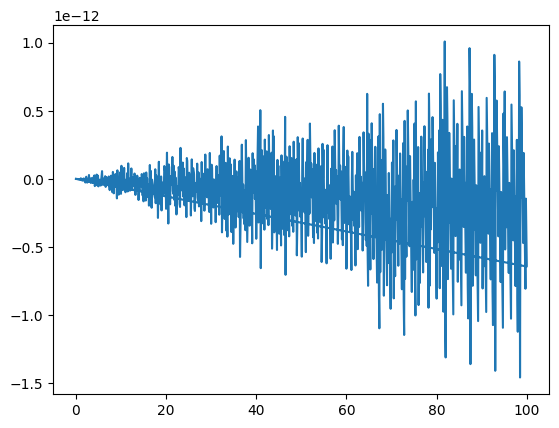

In [ ]:

plt.plot(qq[0:2000],oo[0:2000])